# Exploratory Data Analysis

In [254]:
import sqlite3
from pathlib import Path
import pandas as pd

In [255]:
folder = Path("data/score.db")
con = sqlite3.connect(folder) # connect to the database
cur = con.cursor() 

# Shows table names
cur.execute("SELECT * FROM sqlite_master where type='table'")
print(cur.fetchall)

# read the database into a pandas dataframe
df = pd.read_sql_query('Select * from score',con)

# Close the connection to the database
con.close()

<built-in method fetchall of sqlite3.Cursor object at 0x000001BB825A35E0>


In [257]:
df.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [258]:
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [259]:
# Calculating hours of sleep, using inbuilt datetime functions
df['sleep'] = (pd.to_datetime(df['wake_time']) - pd.to_datetime(df['sleep_time']) +timedelta(hours=24))% timedelta(hours=24)
df['sleep'] = df['sleep'].dt.components['hours']

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 15900 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

In [261]:
df.describe()

,index,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep
count,15900.000000,15900.000000,15405.000000,15900.000000,15900.000000,15900.000000,15900.000000,15122.000000,15900.000000
mean,7949.500000,0.886541,67.165401,13.880000,8.906038,15.213459,10.312579,93.270268,7.846478
std,4590.078975,0.751346,13.977879,6.552584,6.663852,1.758941,4.461861,7.984230,0.602334
min,0.000000,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000,4.000000
25%,3974.750000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,8.000000
50%,7949.500000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,8.000000
75%,11924.250000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,8.000000
max,15899.000000,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000,8.000000


## Initial Observations from numerical data

1) Number of Siblings looks to be normally distributed, with the mean close to 1 sibling. This could be indicative of Singaporean family sizes

2) Final test, our target variable of interest, only ranges from 32 to 100, which gives us a tight range of predictions. Also, there are some blanks in this column for some reason.

3) Number of male classmates is higher than number of female classmates at all percentiles, which could indicate more male-only schools than females, or that there are simply more males in this dataset.

4) Age ranges between 15 to 16, which is expected for O-level students, and there is a -5 age, which is definitely a mistake which needs to be dealt with.

5) Hours per week seems quite high, which has a mean of 10 hours. Perhaps this number is inflated if the students were questioned and surveyed on their studying habits?

6) Attendance rate is very high, with a mean of 93. there seems to be a student with 40% attendance, which might be an outlier which requires cleaning up.

7) Total hours of sleep seems to be quite regular at 8, with a minimum of 4, which is another possible outlier.

In [263]:
numerical = df.describe().columns
numerical = numerical.drop('index')
num_cols = df[numerical]

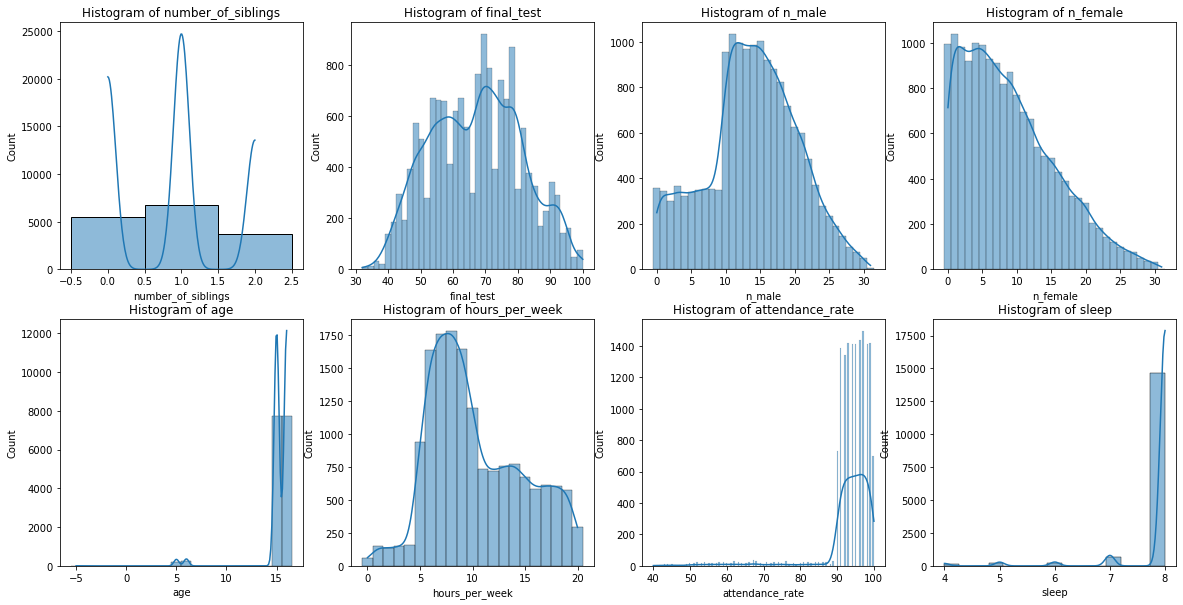

In [264]:
num = 1
fig, axis = plt.subplots(2,4)
for feature in num_cols.columns:
    if num>4 and num <=8:
        row = 1
    else:
        row = 0
    col = num%4 -1
    
    if feature in ['number_of_siblings', 'n_male','n_female','age','hours_per_week']:
        sns.histplot(data = num_cols,x=feature, ax = axis[row,col], kde=True, discrete=True)
    else:
        sns.histplot(data = num_cols,x=feature, ax = axis[row,col], kde=True)
    axis[row,col].set_title('Histogram of ' + feature)
    num +=1
fig.set_size_inches(20,10)

## Data Cleaning

In [265]:
df[df['final_test'].isna()]
# 495 students do not have a final score. This is 2% of the sample, which is relatively small

df = df[df['final_test'].notnull()] 
# Filter out the students who do not have a final score

df.shape

(15405, 19)

In [266]:
df[df['age']<15] # There are 436 students who are below 15, and their ages range between -5 and 6.

'''From SEAB, the authority in charge of Examinations in Singapore,
there is an age restriction of 15 years for private candidates. Seeing that the students below 15 and 16 are mostly
5 and 6 years old, I will assume that there is a typo and change all these ages to 15.'''

df['age'].value_counts()

 16.0    7486
 15.0    7483
 6.0      225
 5.0      206
-5.0        4
-4.0        1
Name: age, dtype: int64

In [267]:
df.loc[df['age'] < 15, 'age'] = 15
df['age'].value_counts()

15.0    7919
16.0    7486
Name: age, dtype: int64

<AxesSubplot:xlabel='classmates', ylabel='Count'>

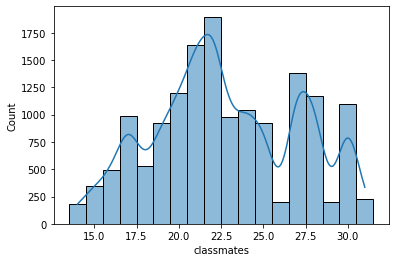

In [271]:
'''From the histograms of male and female classmates, it is clear that female classmates is not normally distributed.
Some feature engineering can be made, by summing male and female, the class size can be found. Also, male and female 
only classrooms can be determined '''

df['classmates'] = df['n_male'] + df['n_female']
sns.histplot(data= df, x='classmates', discrete =True, kde=True) 
# class size seems to be relatively normally distributed, and this will be the feature of choice.

In [272]:
def schtype(row):
    if row['n_male'] == 0 and row['n_female'] == 0:
        return 'S' # Single student
    elif row['n_male'] == 0:
        return 'F' # Female Only
    elif row['n_female'] == 0:
        return 'M' # Male Only
    else:
        return 'N' # Normal, mixed school

In [273]:
df['schtype'] = df.apply(schtype,axis =1)
df['schtype'].value_counts()

N    14090
M      968
F      347
Name: schtype, dtype: int64

In [274]:
df[df['attendance_rate'].isna()] 
# there are 757 students without attendance rate, these values will be imputed later

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,...,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color,sleep,classmates,schtype
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,...,15.0,18.0,NaN,21:00,5:00,public transport,yellow,8,22.0,N
9,9,2,No,Arts,Auditory,3MOMA6,Male,Yes,60.0,13.0,...,16.0,16.0,NaN,22:30,6:30,private transport,green,8,22.0,N
58,58,1,No,Clubs,Visual,GF3FCX,Male,No,51.0,19.0,...,15.0,18.0,NaN,22:30,6:30,private transport,black,8,30.0,N
62,62,0,Yes,None,Auditory,68GQ7S,Male,Yes,85.0,12.0,...,16.0,8.0,NaN,23:00,7:00,walk,red,8,21.0,N
85,85,0,No,Arts,Auditory,B6U6DY,Female,Yes,94.0,18.0,...,16.0,8.0,NaN,23:00,7:00,walk,yellow,8,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15790,15790,0,No,Clubs,Auditory,GJR1LN,Male,No,61.0,21.0,...,15.0,20.0,NaN,22:00,6:00,private transport,green,8,22.0,N
15827,15827,0,Yes,Arts,Visual,F90UM0,Female,No,84.0,19.0,...,16.0,10.0,NaN,23:00,7:00,walk,green,8,20.0,N
15832,15832,2,No,Arts,Auditory,D5GK79,Male,Yes,74.0,14.0,...,15.0,9.0,NaN,21:00,5:00,public transport,black,8,23.0,N
15854,15854,0,No,Clubs,Auditory,05OOPM,Male,Yes,60.0,19.0,...,15.0,10.0,NaN,21:00,5:00,public transport,red,8,21.0,N


['index', 'number_of_siblings', 'final_test', 'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate', 'sleep', 'classmates']


<AxesSubplot:>

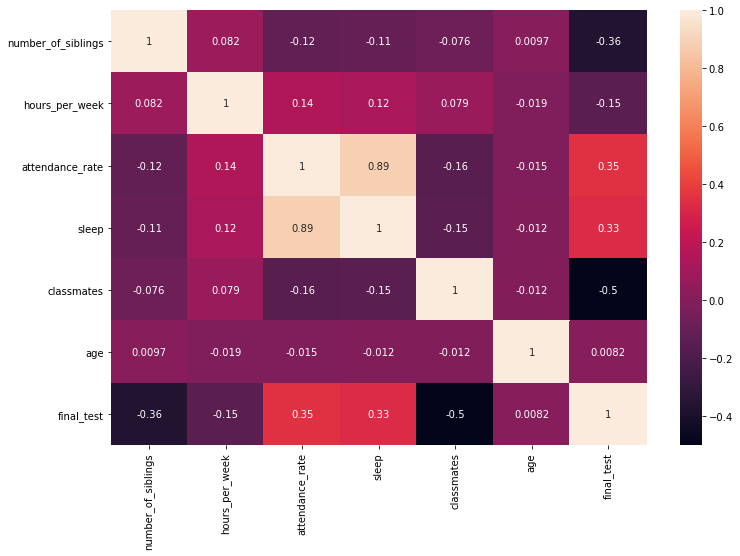

In [275]:
fig, ax = plt.subplots(figsize=(12, 8))
num_cols = list(df.describe().columns)
print(num_cols)
num_cols = ['number_of_siblings','hours_per_week','attendance_rate','sleep','classmates','age','final_test']
corr = df[num_cols].corr()


sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

- Numerical Features and the Correlation with the final_test scores are shown
- Number of Classmates, an engineered feature, seems to have the highest absolute correlation(0.5) with the scores
- Surprisingly, the hours studied per week seemed to have a negative correlation with test scores, suggesting that spending to much time on math might not be beneficial

## Categorical Feature Analysis

In [276]:
print(df.columns)
cat_cols = ['direct_admission','CCA','learning_style','gender','tuition','mode_of_transport','bag_color','schtype']

Index(['index', 'number_of_siblings', 'direct_admission', 'CCA',
       'learning_style', 'student_id', 'gender', 'tuition', 'final_test',
       'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate',
       'sleep_time', 'wake_time', 'mode_of_transport', 'bag_color', 'sleep',
       'classmates', 'schtype'],
      dtype='object')


In [277]:
def catanalysis(df,cat_cols):
    for feature in cat_cols:
        print('\n -------- Pivot Table for ' + feature + ' --------')
        print(df[['final_test',feature]].groupby(feature).mean()) # Considering the average score only

In [278]:
catanalysis(df,cat_cols)


 -------- Pivot Table for direct_admission --------
                  final_test
direct_admission            
No                 64.989500
Yes                72.359719

 -------- Pivot Table for CCA --------
        final_test
CCA               
ARTS     64.121951
Arts     64.059978
CLUBS    61.189781
Clubs    63.946621
NONE     76.669355
None     76.782304
SPORTS   63.504854
Sports   64.056684

 -------- Pivot Table for learning_style --------
                final_test
learning_style            
Auditory         63.888324
Visual           71.586307

 -------- Pivot Table for gender --------
        final_test
gender            
Female   66.999869
Male     67.329158

 -------- Pivot Table for tuition --------
         final_test
tuition            
N         61.706349
No        62.909741
Y         72.009585
Yes       70.408664

 -------- Pivot Table for mode_of_transport --------
                   final_test
mode_of_transport            
private transport   67.253010
public transpor

-From the pivot tables above, there are some problematic entries, like CCA and Tuition, where the responses are not capitalized. Lets fix them and continue the analysis

-Transport and bag color do not seem to have a huge difference in the mean scores, so they will be ignored

In [279]:
# Data cleaning for CCA
df.loc[df['CCA'] == 'Arts', 'CCA'] = 'ARTS'
df.loc[df['CCA'] == 'Clubs', 'CCA'] = 'CLUBS'
df.loc[df['CCA'] == 'None', 'CCA'] = 'NONE'
df.loc[df['CCA'] == 'Sports', 'CCA'] = 'SPORTS'

# Data cleaning for Tuition
df.loc[df['tuition'] == 'Yes', 'tuition'] = 'Y'
df.loc[df['tuition'] == 'No', 'tuition'] = 'N'

In [280]:
cat_cols = ['direct_admission','CCA','learning_style','gender','tuition','schtype']
catanalysis(df,cat_cols)


 -------- Pivot Table for direct_admission --------
                  final_test
direct_admission            
No                 64.989500
Yes                72.359719

 -------- Pivot Table for CCA --------
        final_test
CCA               
ARTS     64.061989
CLUBS    63.850761
NONE     76.778648
SPORTS   64.041894

 -------- Pivot Table for learning_style --------
                final_test
learning_style            
Auditory         63.888324
Visual           71.586307

 -------- Pivot Table for gender --------
        final_test
gender            
Female   66.999869
Male     67.329158

 -------- Pivot Table for tuition --------
         final_test
tuition            
N         62.864404
Y         70.466154

 -------- Pivot Table for schtype --------
         final_test
schtype            
F         67.930836
M         69.533058
N         66.983889


## Summary of Categorical Features

1) Direct Admission, Tuition and a Visual Learning Style seems to have a positive effect on the final O level Math score, which is expected as the students who performed better in PSLE get to join direct admission, students with access to tuition have another source of education, while Visual Learning seems more applicable to a logic based subject like Mathematics.

2) Those without CCAs also tended to perform better (on average) as compared to those without, perhaps due to the extra time students had after school to practice and master the subject.

3) On average,males performed better than females, and those from a male only class seemed to do better as well. Mixed gender classes also performed worse than a controlled gender class!

## Start of Model Building (Approach 1, Regression)

- Firstly, the data has to be split into training and test sets, and the missing values in attendance_rate has to be imputed.

- Categorical Features will be one hot encoded

- Following, the numerical features will be scaled to allow for faster model training.

- Lastly, regression models will be used for training

In [281]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15405 entries, 0 to 15899
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15405 non-null  int64  
 1   number_of_siblings  15405 non-null  int64  
 2   direct_admission    15405 non-null  object 
 3   CCA                 15405 non-null  object 
 4   learning_style      15405 non-null  object 
 5   student_id          15405 non-null  object 
 6   gender              15405 non-null  object 
 7   tuition             15405 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15405 non-null  float64
 10  n_female            15405 non-null  float64
 11  age                 15405 non-null  float64
 12  hours_per_week      15405 non-null  float64
 13  attendance_rate     14648 non-null  float64
 14  sleep_time          15405 non-null  object 
 15  wake_time           15405 non-null  object 
 16  mode

In [283]:
# Extracting the features that will be used for training
table = df[['number_of_siblings','direct_admission','CCA','learning_style','gender','tuition','age','hours_per_week',
          'attendance_rate','sleep','classmates','schtype']]

# Target is the variable we want to predict, the student's test scores
target = df['final_test']

In [284]:
cat = ['direct_admission','CCA','learning_style','gender','tuition','schtype'] # 6 total categorical features

num = ['number_of_siblings','age','hours_per_week','attendance_rate','sleep','classmates'] # 6 total numerical features

In [285]:
def preprocess(X,y,flag): # Function for preprocessing data in training
    scaler = StandardScaler()
    target_scaler = MinMaxScaler()
    
    '''One hot encoding categorical variables'''
    X = pd.get_dummies(X,['direct_admission','CCA','learning_style','gender','tuition','schtype'])
    
    
    ''' Split dataset into test and training'''
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42) # For reproducibility
    
    '''Impute missing values in attendance_rate, without any spillover from training data'''
    X_train['attendance_rate'].fillna(X_train['attendance_rate'].median(), inplace = True)
    X_test['attendance_rate'].fillna(X_test['attendance_rate'].median(), inplace = True)
    
    '''Scaling of numerical data'''
    X_train[num] = scaler.fit_transform(X_train[num])
    X_test[num] = scaler.transform(X_test[num])
    
    if flag == 'reg': #If the problem is regression, the target needs to be scaled as well
        y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
        y_test = target_scaler.transform(y_test.values.reshape(-1,1))
        return X_train, X_test, y_train, y_test, target_scaler 
        
    
    
    return X_train, X_test, y_train, y_test

In [286]:
X_train, X_test, y_train, y_test, scaler = preprocess(table,target,'reg')

C:\Users\De Yuan\Anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\De Yuan\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\De Yuan\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [287]:
def Random_Forest(X_train, X_test, y_train, y_test):
    RFF = RandomForestRegressor(random_state = 42)
    RFF.fit(X_train, y_train.ravel())
    RFF_predictions = RFF.predict(X_test)
    print('Random Forest Regressor score is %f' % RFF.score(X_test, y_test))
    print(scaler.inverse_transform(RFF_predictions.reshape(-1,1)))
    return RFF
    
def Support_Vector(X_train, X_test, y_train, y_test):
    SVMreg = svm.SVR()
    SVMreg.fit(X_train, y_train.ravel())
    predictions =SVMreg.predict(X_test)
    print('Support Vector Regressor score is %f' % SVMreg.score(X_test, y_test))
    return SVMreg

def linear_regression(X_train, X_test, y_train, y_test):
    lm = linear_model.LinearRegression()
    lm.fit(X_train, y_train)
    lm_predictions = lm.predict(X_test)
    print('Linear Regression score is %f' % lm.score(X_test, y_test))
    return lm
    
def KNearest_neighbor(X_train, X_test, y_train, y_test):
    KNNR = KNeighborsRegressor()
    KNNR.fit(X_train,y_train)
    print('K-Nearest Neighbors Regressor score is %f' % KNNR.score(X_test, y_test))
    return KNNR

In [288]:
print('------ Approach 1 Scores -----')

RFF = Random_Forest(X_train, X_test, y_train, y_test)
SVMreg = Support_Vector(X_train, X_test, y_train, y_test)
lm = linear_regression(X_train, X_test, y_train, y_test)
KNNR = KNearest_neighbor(X_train, X_test, y_train, y_test)

------ Approach 1 Scores -----
Random Forest Regressor score is 0.853275
[[64.954]
 [61.55 ]
 [61.79 ]
 ...
 [60.15 ]
 [80.99 ]
 [67.59 ]]
Support Vector Regressor score is 0.733955
Linear Regression score is 0.578098
K-Nearest Neighbors Regressor score is 0.694547


In [ ]:
RFF_predictions

## Model Building (Approach 2, Classification)
- Simple split from 66th and 33rd percentile, to ensure that there are 3 classes with relatively equal distribution for easier model training

| Raw Score  | Final Grade |
| ---------  | ----------- |
| 74 & Above |    Good     |
|  60 to 73  |   Average   |
| 59 & Below |  Needs Help |



In [302]:
print(df['final_test'].quantile(0.33),df['final_test'].quantile(0.66))
# Simple way to split dataset into 3 relatively equally sized classes

60.0 74.0


In [303]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer, mean_absolute_error, mean_squared_error

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [304]:
def grading(row):
    score = row['final_test']
    if score >= 74:
        return 'Good' # High Distinction
    elif score >= 60:
        return 'Average' # Distinction
    else: 
        return 'Needs Help' # Merit
   


In [305]:
df['grade'] = df.apply(grading,axis =1)

In [306]:
df['grade'].value_counts()

Good          5319
Needs Help    5063
Average       5023
Name: grade, dtype: int64

In [307]:
# Features are unchanged from before
table = df[['number_of_siblings','direct_admission','CCA','learning_style','gender','tuition','age','hours_per_week',
          'attendance_rate','sleep','classmates','schtype']]

# Target variable is now the grade column
target = df['grade']

# Preprocessing the data
X_train, X_test, y_train, y_test = preprocess(table,target,'class')

C:\Users\De Yuan\Anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\De Yuan\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\De Yuan\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

------ DecisionTreeClassifier() ------
Average Accuracy:  0.7806
Average f1_score:  0.7816


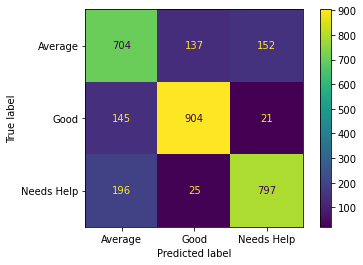

In [308]:
# Simple decision tree classifier
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
plotcm(dtree_model, dtree_predictions,X_test,y_test)


In [309]:
def plotcm(model, predictions,X_test, y_test): # Function to help plot confusion matrix, calculate score and f1 score
    cm = confusion_matrix(y_test,predictions,labels = model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
    print('------ ' + str(model) + ' ------')
    disp.plot()
    print('Average Accuracy: ',"{:.4f}".format(model.score(X_test,y_test)))
    print('Average f1_score: ',
          "{:.4f}".format(f1_score(y_test,predictions,labels = model.classes_, average='weighted')))

------ SVC() ------
Average Accuracy:  0.7627
Average f1_score:  0.7630


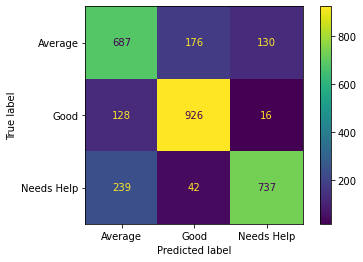

In [310]:
svm_model = SVC().fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

plotcm(svm_model, svm_predictions,X_test,y_test)



------ RandomForestClassifier(random_state=42) ------
Average Accuracy:  0.8114
Average f1_score:  0.8115


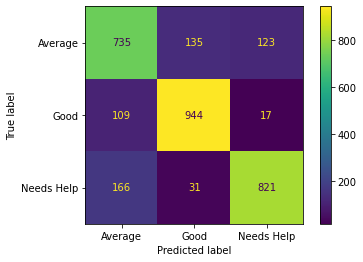

In [311]:
RFC_model = RandomForestClassifier(random_state=42).fit(X_train,y_train)
RFC_predictions = RFC_model.predict(X_test)

plotcm(RFC_model, RFC_predictions,X_test,y_test)

In [143]:
from sklearn.model_selection import RandomizedSearchCV

criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
min_samples_split = [2, 5, 10]
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

RFC = RandomForestClassifier(random_state=42)

scorer = make_scorer(f1_score, average = 'weighted') # Using weighted f1_score as the metric

RFC_random = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, n_iter = 20,
                                scoring= scorer,
                                cv=3, verbose =2, random_state =42)



In [144]:
# This takes about 10 minutes to fully run
RFC_random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END criterion=gini, max_depth=73, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END criterion=gini, max_depth=73, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=73, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END criterion=entropy, max_depth=73, min_samples_split=10, n_estimators=2000; total time=  25.7s
[CV] END criterion=entropy, max_depth=73, min_samples_split=10, n_estimators=2000; total time=  25.9s
[CV] END criterion=entropy, max_depth=73, min_samples_split=10, n_estimators=2000; total time=  27.5s
[CV] END criterion=entropy, max_depth=178, min_samples_split=10, n_estimators=1200; total time=  14.8s
[CV] END criterion=entropy, max_depth=178, min_samples_split=10, n_estimators=1200; total time=  15.0s
[CV] END criterion=entropy, max_depth=178, min_samples_split=10, n_estimators=1200; total time=  15.0s
[CV] END criterion=gini, max_d

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [146]:
print(RFC_random.best_params_)

best_random = RFC_random.best_estimator_

{'n_estimators': 2000, 'min_samples_split': 10, 'max_depth': 73, 'criterion': 'entropy'}


------ RandomForestClassifier(criterion='entropy', max_depth=73, min_samples_split=10,
                       n_estimators=2000, random_state=42) ------
Average Accuracy:  0.8221
Average f1_score:  0.8221


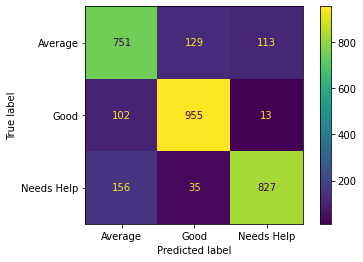

In [162]:
plotcm(best_random, best_random.predict(X_test),X_test,y_test)

In [151]:
from sklearn.model_selection import GridSearchCV

# Performing Grid search with similar hyperparameters to random search result 
criterion = ['entropy']
max_depth = [70,80]
min_samples_split = [10,15]
n_estimators = [2000,2500]

param_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, scoring= scorer,
                          cv = 3, n_jobs = -1, verbose = 2)

In [152]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [70, 80],
                         'min_samples_split': [10, 15],
                         'n_estimators': [2000, 2500]},
             scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [312]:
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

{'criterion': 'entropy', 'max_depth': 70, 'min_samples_split': 10, 'n_estimators': 2500}


------ RandomForestClassifier(criterion='entropy', max_depth=70, min_samples_split=10,
                       n_estimators=2500, random_state=42) ------
Average Accuracy:  0.8231
Average f1_score:  0.8231


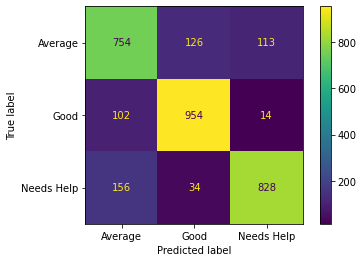

In [313]:
plotcm(best_grid, best_grid.predict(X_test),X_test,y_test)

- As seen from the confusion matrix, the Accuracy and F1-score are relatively high, at 0.8231 each for the final model.

- The main source of confusion for the model is correctly distinguishing the average students from the good ones and the ones who require help.

- This is understandable as the 'average' class was defined as those who scored between 60 to 73 points, which is right between the good and underperforming students.

- This will be illustrated by looking at the students which the model predicted incorrectly, to see their actual scores.

## Model Evaluation

- From the two approaches, the two best performing models were the random forest regressor and the random forest classifier.

- The two models will be used to generate predictions for the entire dataset, and analysis will be done to justify which model would be more useful in this scenario

In [314]:
def preprocesstable(table):
    scaler = StandardScaler()
    
    '''One hot encoding categorical variables'''
    table = pd.get_dummies(table,['direct_admission','CCA','learning_style','gender','tuition','schtype'])
    
    '''Impute missing values in attendance_rate, without any spillover from training data'''
    table['attendance_rate'].fillna(table['attendance_rate'].median(), inplace = True)
    
    '''Scaling of numerical data'''
    table[num] = scaler.fit_transform(table[num])
    
    return table

In [315]:
table = preprocesstable(table) #preprocess the entire table

In [316]:
df['predicted_grade'] = best_grid.predict(table)

In [317]:
df[['grade','predicted_grade']].head()

,grade,predicted_grade
0,Average,Good
1,Needs Help,Needs Help
2,Good,Good
3,Average,Average
4,Average,Average


In [318]:
print('Total wrongly classified students: ' + str(len(df[df['grade'] != df['predicted_grade']])))
# All the wrong predictions, 1829 occurrences

print('Total students: '+ str(len(df)))
print('Percentage of wrongly classified students: ' + 
      "{:.2f}".format(len(df[df['grade'] != df['predicted_grade']])/len(df) *100) +'%')


print('Students who performed well but were predicted to underperform: ' +
      str(len(df[(df['grade'] == 'Good') & (df['predicted_grade']=='Needs Help')]))) 
# 38 occurrences of Good students predicted to require help

print('Students who underperformed but were predicted to do well: ' +
    str(len(df[(df['predicted_grade'] == 'Good') & (df['grade']=='Needs Help')]))) 
# 82 occurrences of students who required help, but actually performed well



Total wrongly classified students: 1829
Total students: 15405
Percentage of wrongly classified students: 11.87%
Students who performed well but were predicted to underperform: 38
Students who underperformed but were predicted to do well: 82


- Considering the cut-off for the 3 different classes are final_test scores of 60 and 74, there are only 120 total students that the model got a very incorrect prediction. (Mistaking an underperforming student as a good one and vice-versa)

- This number is less than 1% of the whole dataset, and I believe this model would be very beneficial to be deployed for teachers to potentially identify the weaker students and offer their assistance in advance!

In [319]:
RFF_predictions = RFF.predict(table)

df['predicted_test'] = scaler.inverse_transform(RFF_predictions.reshape(-1,1))


In [320]:
print('Mean Absolute Error for Approach 1: ' 
      +"{:.2f}".format(mean_absolute_error(df['final_test'],df['predicted_test'])))
print('Mean Squared Error for Approach 1: ' 
      + "{:.2f}".format(mean_squared_error(df['final_test'],df['predicted_test'])))

Mean Absolute Error for Approach 1: 1.83
Mean Squared Error for Approach 1: 9.31


In [321]:
df[['final_test','predicted_test']].head()

,final_test,predicted_test
0,69.0,81.630000
1,47.0,47.580000
2,85.0,86.110000
3,64.0,62.855333
4,66.0,61.430000


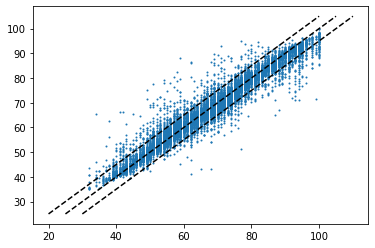

In [322]:
plt.scatter(df['final_test'],df['predicted_test'], s=1) 
plt.plot([25,105],[25,105],'k--')

# Define a good prediction as +- 5 points away from the actual score
plt.plot([20,100],[25,105],'k--') # lower bound
plt.plot([30,110],[25,105],'k--') # upper bound
plt.show()

In [323]:
# Using this criteria, 92% of student's scores can be predicted to within +- 5 of the actual score! 

print('Percentage of students whose final score is within +- 5 of their predicted score: ' +
      "{:.2f}".format(len(df[abs(df['final_test']-df['predicted_test']) <=5])/len(df) *100) +'%')

Percentage of students whose final score is within +- 5 of their predicted score: 92.25%


## Conclusion

- This dataset has been extremely interesting and relevant to a Singaporean context, and kudos to the team for doing the most important job, which is collecting and maintaining this dataset.

- Keeping in mind the objective of helping schools identify weaker students prior to examinations, I believe the best approach is to combine both classification and regression.

- I would first use the classification model on a student, to determine which class they are likely to be in. As shown previously, there is a slight chance (~12% that this student is wrongly classified).

- Of this 12%, only ~2% of them are students who are badly misclassified, as either being in 'Needs Help' when they are actually doing well, or vice-versa.

- To work with this 12% of misclassification, the regression model can be used as another check by the school's staff to give a rough estimate of how well the student can perform in the O levels

- Hopefully, the usage of the 2 models can allow teachers to identify the students in the 'Needs Help' class, or those in the 'Average' class, and intervene by offering them more help and supervision in their revision! (To the best of their ability)